# Can we use the Federal Prime Lending Rate to predict Mutual Fund Performance?

In [160]:
import yfinance as yf
import pandas as pd
import requests
import pickle
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as ts

import warnings


%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
xlv = yf.Ticker('XLV')
xlv_hist = xlv.history(period = 'max', actions = False)
xlv_hist['Change'] = xlv_hist['Close'] - xlv_hist['Open']
xlv_hist['Volume'] = xlv_hist.Volume.astype('float64')
xlv_hist.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-12-22,18.41,18.60,18.41,18.58,5700.0,0.17
1998-12-23,18.69,18.99,18.69,18.99,18100.0,0.30
1998-12-24,19.02,19.11,18.94,19.11,4900.0,0.09
1998-12-28,19.05,19.11,18.83,18.83,15500.0,-0.22
1998-12-29,18.83,19.25,18.83,19.25,5300.0,0.42


In [177]:
xlv_hist = xlv_hist.iloc[::-1]
xlv_hist_monthly = xlv_hist['Close'].resample('MS')
xlv_monthly_mean = xlv_hist_monthly.mean()
xlv_monthly_mean.isnull().sum()

0

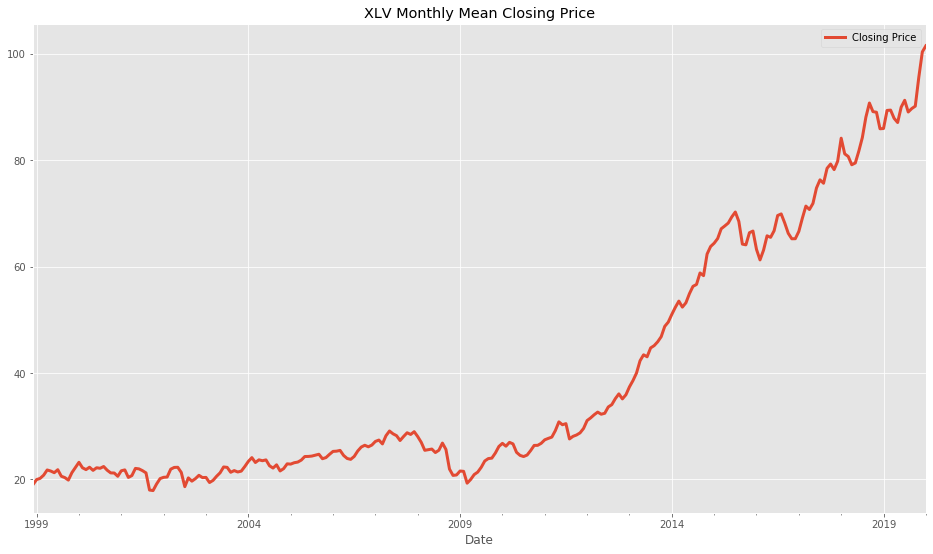

In [186]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (16,9))
xlv_monthly_mean.plot(linewidth = 3, label = 'Closing Price')
plt.title('XLV Monthly Mean Closing Price')
plt.legend()
plt.show()

#There is an upwards Trend

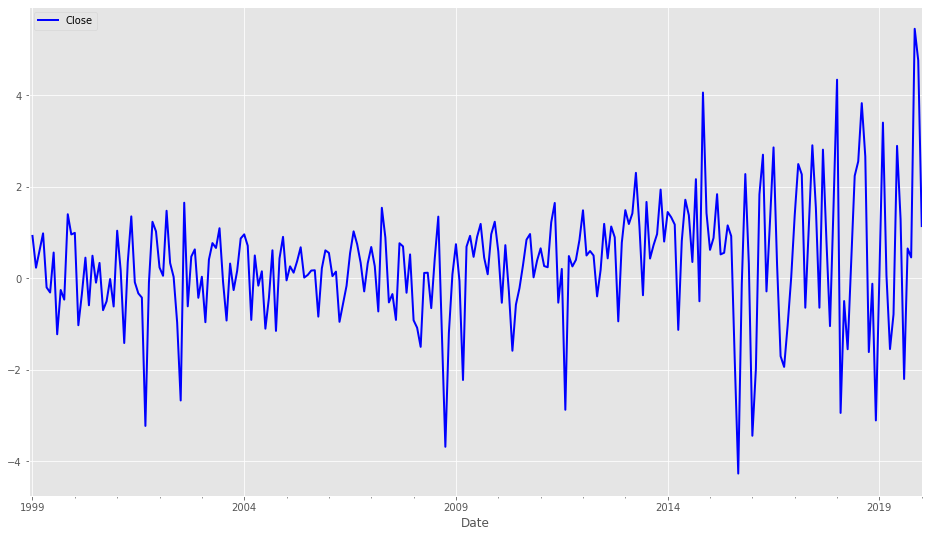

In [189]:
#Take 1st order difference of XLV
xlv_monthly_diff = xlv_monthly_mean.diff(periods = 1)
fig = plt.figure(figsize = (16, 9))
xlv_monthly_diff.plot(linewidth = 2, c = 'b')
plt.legend()
plt.show()

In [191]:
rollmean = xlv_monthly_mean.rolling(window = 2).mean()
xlv_minus_rollmean = xlv_monthly_mean - rollmean

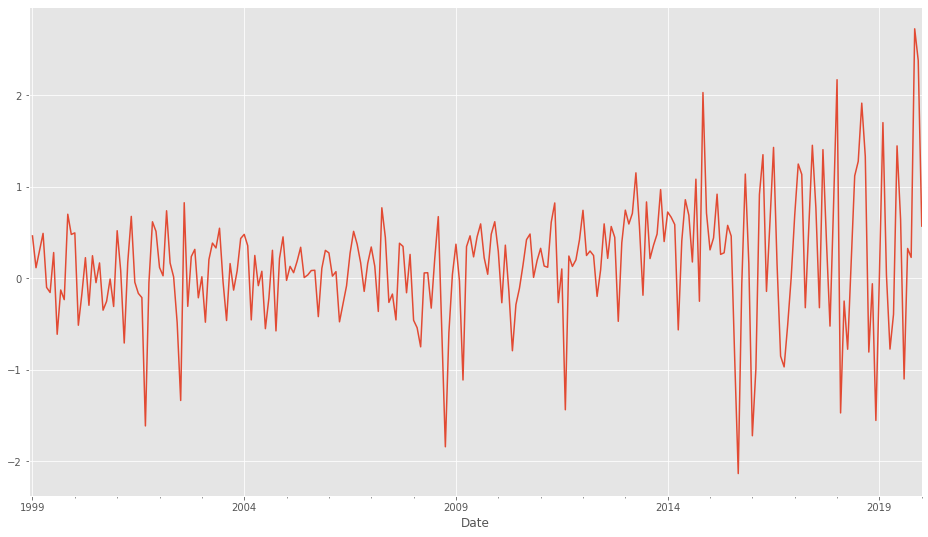

In [197]:
xlv_minus_rollmean.plot(figsize = (16,9));

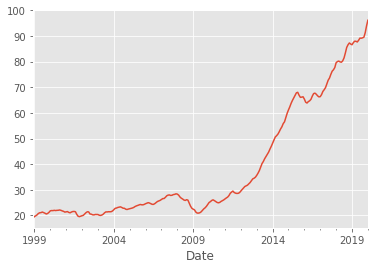

In [202]:
exp_rollmean = xlv_monthly_mean.ewm(halflife = 2).mean()
exp_rollmean.plot()

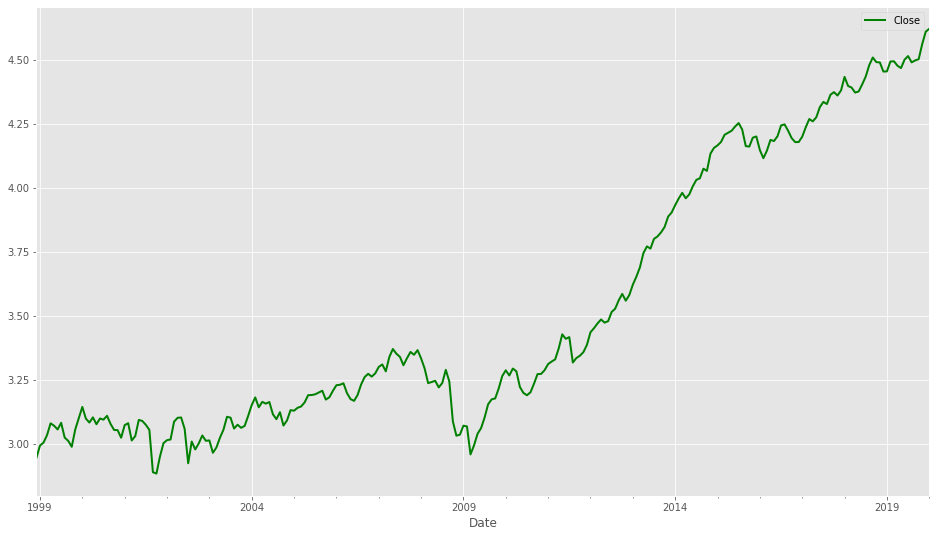

In [190]:
import numpy as np
xlv_log = pd.Series(np.log(xlv_monthly_mean), index = xlv_monthly_mean.index)
fig = plt.figure(figsize = (16,9))
xlv_log.plot(linewidth = 2, c = 'g')
plt.legend()
plt.show()

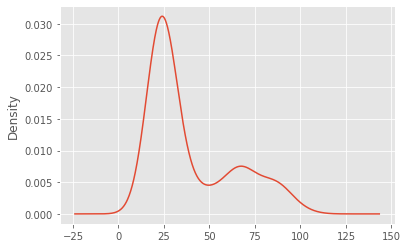

In [193]:
xlv_monthly_mean.plot(kind = 'kde');
#Not normally distributed

In [196]:
# Perform a Dickey-Fuller test for stationarity
